# Breast Cancer Classification using Logistic Regression

## Dataset: Wisconsin Breast Cancer Dataset
**Author**: Gourav Karwasara
**Date**: 11 February 2026  
**Objective**: Build a supervised binary classification model to predict malignant (M) vs benign (B) breast cancer diagnoses

## 1. Setup and Data Loading

Importing required libraries for data processing, modeling, and evaluation.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)

### 1.1 Load Dataset

The dataset contains 569 patient records with 30 computed features from digitized images of breast mass samples. The target variable is `diagnosis` (M = Malignant, B = Benign).

In [2]:
df = pd.read_csv("data/data.csv")

In [3]:
df.shape

(569, 33)

### 1.2 Initial Data Inspection

Examining the structure, features, and initial observations from the dataset.

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='str')

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 2. Data Preparation and Preprocessing

### 2.1 Handling Data Quality Issues

The `Unnamed: 32` column contains only NaN values and will be dropped as it provides no information for modeling.

In [6]:
df["Unnamed: 32"].unique()

array([nan])

In [7]:
df.drop(columns=["Unnamed: 32"],inplace=True)

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='str')

### 2.2 Encoding the Target Variable

Converting the categorical diagnosis variable from M/B to binary 1/0:
- M (Malignant) → 1
- B (Benign) → 0

This encoding is necessary for supervised classification models.

In [9]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
df["diagnosis"] = df["diagnosis"].map({"M":1,"B":0})

In [11]:
df["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

### 2.3 Data Summary Statistics

Reviewing data types, missing values, and statistical distributions to inform preprocessing decisions.

In [12]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             569 non-null

### 2.4 Exploratory Data Analysis: Feature Distributions

Visualizing how each mean feature differs between malignant (M) and benign (B) diagnoses to understand which features may be most predictive.

**Key Observations**:
- **Strong discriminative features**: Features like `radius_mean`, `perimeter_mean`, `area_mean`, `concavity_mean`, and `concave points_mean` show clear separation between malignant (red) and benign (green) cases, with malignant tumors generally having higher values.
- **Overlapping features**: Features like `smoothness_mean`, `symmetry_mean`, and `fractal_dimension_mean` show more overlap between the two classes, suggesting they may be less predictive individually.
- **Class imbalance visible**: The green (benign) distributions are generally larger, reflecting the 63% benign vs 37% malignant ratio in the dataset.

These patterns suggest that the model should be able to learn meaningful distinctions, particularly from the size-related features (radius, perimeter, area) and shape-related features (concavity, concave points).

In [13]:
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

features_mean=list(df.columns[2:12])

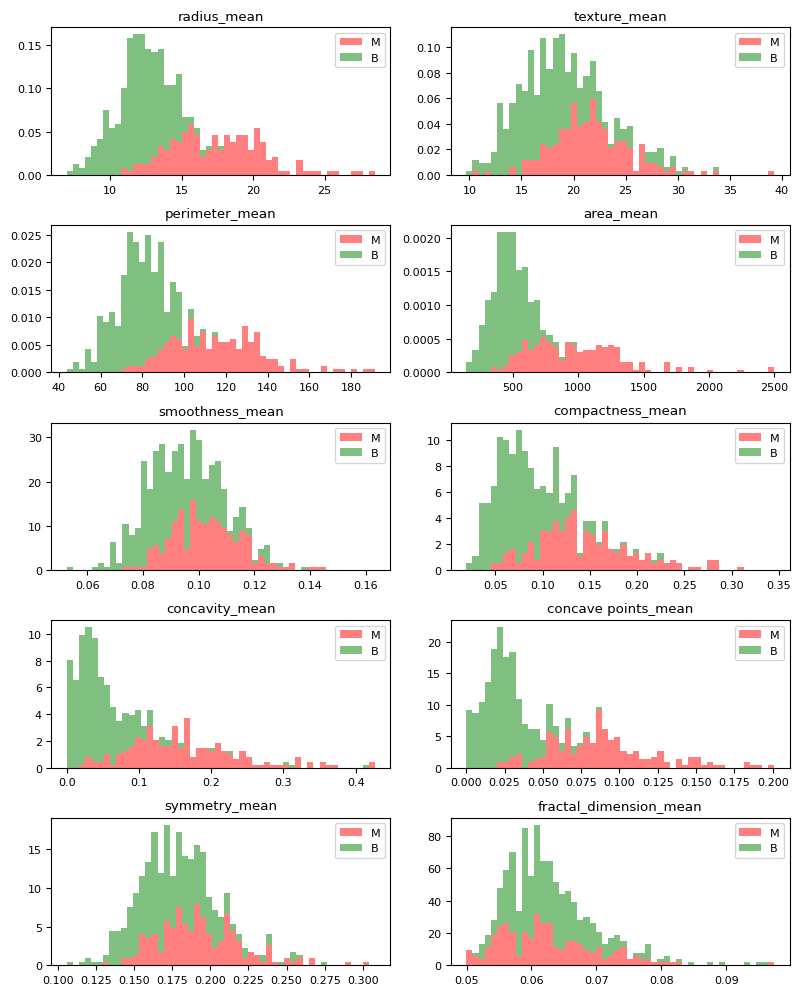

In [14]:
plt.rcParams.update({"font.size": 8})

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()

for idx, ax in enumerate(axes):
    col = features_mean[idx]

    binwidth = (df[col].max() - df[col].min()) / 50
    bins = np.arange(df[col].min(), df[col].max() + binwidth, binwidth)

    ax.hist(
        [dfM[col], dfB[col]],
        bins=bins,
        alpha=0.5,
        stacked=True,
        density=True,
        label=["M", "B"],
        color=["r", "g"],
    )
    ax.legend(loc="upper right")
    ax.set_title(col)

plt.tight_layout()
plt.show()

## 3. Model Training

### 3.1 Feature Selection and Train/Test Split

- **Features (X)**: All computed features (30 total) excluding `id` and `diagnosis`
- **Target (y)**: Binary diagnosis (0 = Benign, 1 = Malignant)
- **Split ratio**: 80% training, 20% testing
- **Stratification**: Applied to maintain class distribution in both sets

In [15]:
features = df.columns.difference(["id", "diagnosis"])

In [16]:
df[features].describe()

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,654.889104,40.337079,880.583128,0.104341,0.025478,0.254265,0.048919,0.011796,0.114606,0.088799,...,16.269190,0.096360,0.007041,0.132369,0.181162,0.020542,0.290076,19.289649,1.216853,25.677223
std,351.914129,45.491006,569.356993,0.052813,0.017908,0.157336,0.038803,0.006170,0.065732,0.079720,...,4.833242,0.014064,0.003003,0.022832,0.027414,0.008266,0.061867,4.301036,0.551648,6.146258
min,143.500000,6.802000,185.200000,0.019380,0.002252,0.027290,0.000000,0.000000,0.000000,0.000000,...,7.930000,0.052630,0.001713,0.071170,0.106000,0.007882,0.156500,9.710000,0.360200,12.020000
25%,420.300000,17.850000,515.300000,0.064920,0.013080,0.147200,0.020310,0.007638,0.064930,0.029560,...,13.010000,0.086370,0.005169,0.116600,0.161900,0.015160,0.250400,16.170000,0.833900,21.080000
50%,551.100000,24.530000,686.500000,0.092630,0.020450,0.211900,0.033500,0.010930,0.099930,0.061540,...,14.970000,0.095870,0.006380,0.131300,0.179200,0.018730,0.282200,18.840000,1.108000,25.410000
75%,782.700000,45.190000,1084.000000,0.130400,0.032450,0.339100,0.074000,0.014710,0.161400,0.130700,...,18.790000,0.105300,0.008146,0.146000,0.195700,0.023480,0.317900,21.800000,1.474000,29.720000
max,2501.000000,542.200000,4254.000000,0.345400,0.135400,1.058000,0.201200,0.052790,0.291000,0.426800,...,36.040000,0.163400,0.031130,0.222600,0.304000,0.078950,0.663800,39.280000,4.885000,49.540000


In [17]:
X = df.drop(columns=["diagnosis", "id"])
y = df["diagnosis"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y if y.nunique() > 1 else None
)


### 3.2 Model Selection and Pipeline

**Model Choice**: Logistic Regression with StandardScaler

**Justification**:
- Logistic Regression is appropriate for binary classification tasks
- Feature scaling (StandardScaler) is necessary because features have different units and scales
- Pipeline ensures preprocessing is fit only on training data, preventing data leakage

**Preprocessing**: StandardScaler normalizes features to mean=0, std=1

In [19]:
pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("model", LogisticRegression(max_iter=5000))
])

pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not wo

### 3.3 Making Predictions

Generating predictions and probability scores for the test set.

In [20]:
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

## 4. Model Evaluation

### 4.1 Performance Metrics

Evaluating model performance using multiple classification metrics:
- **Accuracy**: Overall proportion of correct predictions
- **ROC AUC**: Area under the ROC curve - measures model's ability to distinguish between classes
- **Confusion Matrix**: Breakdown of true positives, true negatives, false positives, false negatives
- **Precision/Recall**: Per-class performance metrics

In [21]:
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba) if y.nunique() == 2 else None
cm = confusion_matrix(y_test, y_pred)

print("=== Test Metrics ===")
print(f"Accuracy: {acc:.4f}")
if auc is not None:
    print(f"ROC AUC:  {auc:.4f}")
print("\nConfusion Matrix (rows=true, cols=pred):")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

=== Test Metrics ===
Accuracy: 0.9649
ROC AUC:  0.9960

Confusion Matrix (rows=true, cols=pred):
[[71  1]
 [ 3 39]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9595    0.9861    0.9726        72
           1     0.9750    0.9286    0.9512        42

    accuracy                         0.9649       114
   macro avg     0.9672    0.9573    0.9619       114
weighted avg     0.9652    0.9649    0.9647       114



### 4.2 Results Interpretation

**Key Findings**:
- **Accuracy: 96.49%** - The model correctly classified 110 out of 114 test cases
- **ROC AUC: 99.60%** - Excellent discrimination ability
- **False Negatives: 3** - Three malignant cases were incorrectly classified as benign (serious concern)
- **False Positives: 1** - One benign case was incorrectly classified as malignant

**Clinical Implications**: The 3 false negatives represent missed cancer diagnoses, which is the more critical error in medical contexts. Future improvements should focus on increasing sensitivity (recall for malignant class).

### 4.3 Model Inspection: Feature Scaling

Examining the standardization parameters learned from the training data.

In [22]:
scaler = pipe.named_steps["scaler"]
train_mean = pd.Series(scaler.mean_, index=features, name="train_mean")
train_std = pd.Series(scaler.scale_, index=features, name="train_std")

print("\n=== Scaler (fit on TRAIN only) ===")
print("Train mean (first 10):")
print(train_mean.head(10))
print("\nTrain std (first 10):")
print(train_std.head(10))

scaler_stats = pd.concat([train_mean, train_std], axis=1)
scaler_stats.to_csv("scaler_stats.csv", index=True)


=== Scaler (fit on TRAIN only) ===
Train mean (first 10):
area_mean                14.166077
area_se                  19.417692
area_worst               92.215868
compactness_mean        659.578242
compactness_se            0.095993
compactness_worst         0.103835
concave points_mean       0.089184
concave points_se         0.049015
concave points_worst      0.181497
concavity_mean            0.062715
Name: train_mean, dtype: float64

Train std (first 10):
area_mean                 3.575146
area_se                   4.285935
area_worst               24.689941
compactness_mean        360.022403
compactness_se            0.014294
compactness_worst         0.053851
concave points_mean       0.081608
concave points_se         0.039642
concave points_worst      0.027616
concavity_mean            0.006963
Name: train_std, dtype: float64


### 4.4 Model Inspection: Feature Importance

Analyzing which features have the strongest influence on predictions. Larger absolute coefficient values indicate stronger predictive power.

In [23]:
model = pipe.named_steps["model"]
coef = pd.Series(model.coef_.ravel(), index=features).sort_values(key=np.abs, ascending=False)
print("\n=== Logistic Regression Coefficients (sorted by |weight|) ===")
print(coef.head(20))


=== Logistic Regression Coefficients (sorted by |weight|) ===
smoothness_mean           1.434093
concavity_se              1.233325
texture_se                1.061264
concave points_se         0.952813
symmetry_worst            0.911406
fractal_dimension_se      0.909029
perimeter_mean           -0.906925
smoothness_worst          0.900477
radius_worst              0.896968
concave points_mean       0.782298
fractal_dimension_mean    0.748295
smoothness_se             0.723111
texture_mean              0.703999
radius_se                -0.593876
area_se                   0.482219
perimeter_worst           0.482089
compactness_mean          0.439950
compactness_worst        -0.439546
symmetry_mean             0.420207
concavity_worst          -0.407611
dtype: float64


### 4.5 ROC Curve Analysis

The ROC (Receiver Operating Characteristic) curve shows the trade-off between true positive rate and false positive rate at different classification thresholds.

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_df = pd.DataFrame({"fpr": fpr, "tpr": tpr, "threshold": thresholds})
print("\nROC curve sample points:")
print(roc_df.head(10))


ROC curve sample points:
        fpr       tpr     threshold
0  0.000000  0.000000           inf
1  0.000000  0.023810  1.000000e+00
2  0.000000  0.928571  5.761873e-01
3  0.013889  0.928571  5.091555e-01
4  0.013889  0.976190  3.145325e-01
5  0.138889  0.976190  6.681775e-02
6  0.138889  1.000000  6.142943e-02
7  1.000000  1.000000  2.353216e-08


### 4.6 Visual Analysis

Creating visual representations of model performance for better interpretation.

#### Confusion Matrix Heatmap

Visualizing the distribution of correct and incorrect predictions.

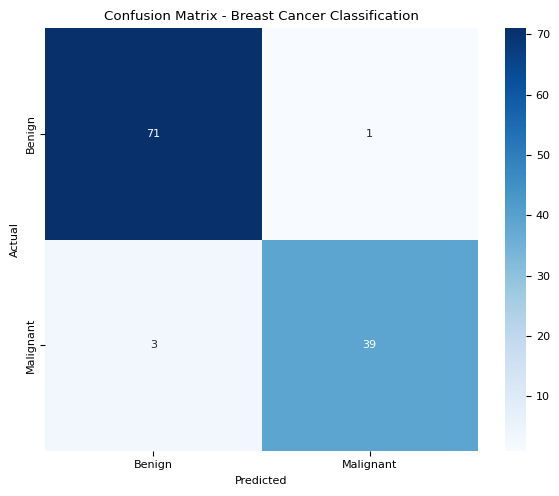

In [25]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Breast Cancer Classification')
plt.tight_layout()
plt.show()

#### ROC Curve

The ROC curve shows the model's discrimination ability across all classification thresholds. The closer the curve is to the top-left corner, the better the model performance.

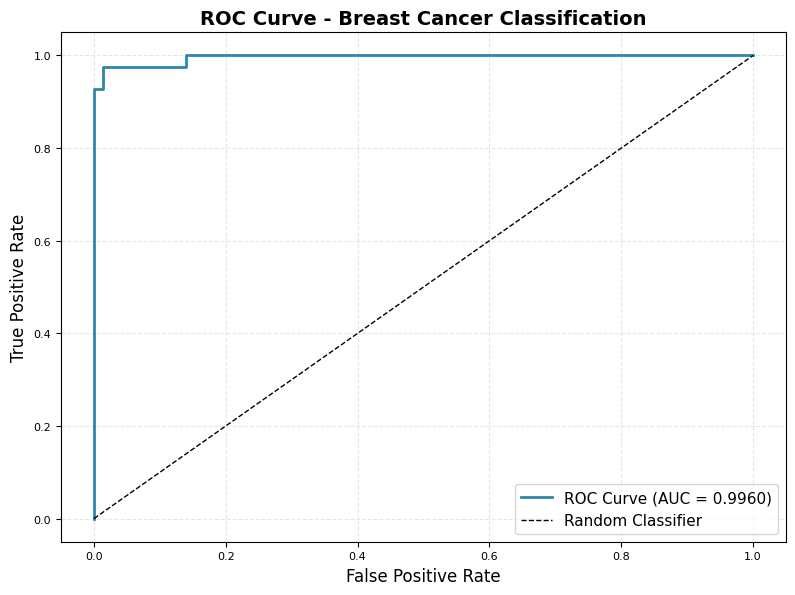

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {auc:.4f})', color='#2E86AB')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Breast Cancer Classification', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

## 5. Summary

### Problem
Binary classification to predict breast cancer diagnosis (malignant vs benign) from tumor measurements.

### Model
Logistic Regression with feature standardization via scikit-learn Pipeline.

### Key Results
- **Test Accuracy**: 96.49%
- **ROC AUC**: 99.60%
- **Best performing features**: smoothness_mean, concavity_se, texture_se

### Challenges and Limitations
1. **Class Imbalance**: Dataset has more benign (357) than malignant (212) cases
2. **False Negatives**: 3 malignant cases were misclassified - concerning for medical application
3. **Limited Feature Engineering**: Used raw features without domain-specific transformations
4. **No Hyperparameter Tuning**: Used default Logistic Regression parameters

### Future Improvements
- Implement class weighting or resampling to address imbalance
- Optimize decision threshold to minimize false negatives
- Try ensemble methods (Random Forest, XGBoost) for comparison
- Cross-validation for more robust performance estimates